# Your info

Full name: Niki Nezakati

Student ID: 98522094

# Q2

In [31]:
# Q2_graded
# Do not change the above line.

# Remove this comment and type your codes here

import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import math
from PIL import Image, ImageFont
import random
from skimage.metrics import structural_similarity as ssim

In [32]:
# Q2_graded
# Do not change the above line.

from tensorflow import keras
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255

mnist_dict = {
              0:[],
              1:[],
              2:[],
              3:[],
              4:[],
              5:[],
              6:[],
              7:[],
              8:[],
              9:[]
             }

for i in range(len(y_train)):
    mnist_dict[y_train[i]].append(i)

Network size 6
Noise percent 0.1
MSE: 1.37, SSIM: 0.01
MSE: 1.25, SSIM: 0.00
MSE: 0.99, SSIM: -0.01
MSE: 0.94, SSIM: 0.00
MSE: 0.74, SSIM: 0.18
MSE: 0.59, SSIM: 0.01
MSE: 0.75, SSIM: 0.17
MSE: 0.73, SSIM: 0.02
MSE: 1.39, SSIM: -0.05
MSE: 1.19, SSIM: 0.07
Noise percent 0.3
MSE: 1.73, SSIM: 0.03
MSE: 1.61, SSIM: 0.00
MSE: 1.59, SSIM: 0.03
MSE: 1.60, SSIM: 0.00
MSE: 1.85, SSIM: 0.00
MSE: 1.23, SSIM: 0.00
MSE: 1.79, SSIM: 0.02
MSE: 1.51, SSIM: 0.00
MSE: 1.72, SSIM: 0.02
MSE: 1.99, SSIM: -0.00
Noise percent 0.6
MSE: 2.21, SSIM: -0.00
MSE: 2.16, SSIM: -0.00
MSE: 2.01, SSIM: 0.00
MSE: 2.38, SSIM: -0.00
MSE: 2.00, SSIM: 0.00
MSE: 2.25, SSIM: -0.00
MSE: 1.97, SSIM: 0.00
MSE: 2.30, SSIM: -0.00
MSE: 2.12, SSIM: -0.00
MSE: 2.26, SSIM: -0.00
Network size 600
Noise percent 0.1
MSE: 0.67, SSIM: 0.19
MSE: 0.97, SSIM: 0.06
MSE: 0.73, SSIM: 0.01
MSE: 0.77, SSIM: 0.14
MSE: 0.76, SSIM: 0.11
MSE: 0.97, SSIM: 0.01
MSE: 0.69, SSIM: 0.13
MSE: 0.73, SSIM: 0.01
MSE: 1.44, SSIM: -0.02
MSE: 1.17, SSIM: 0.03
Noise

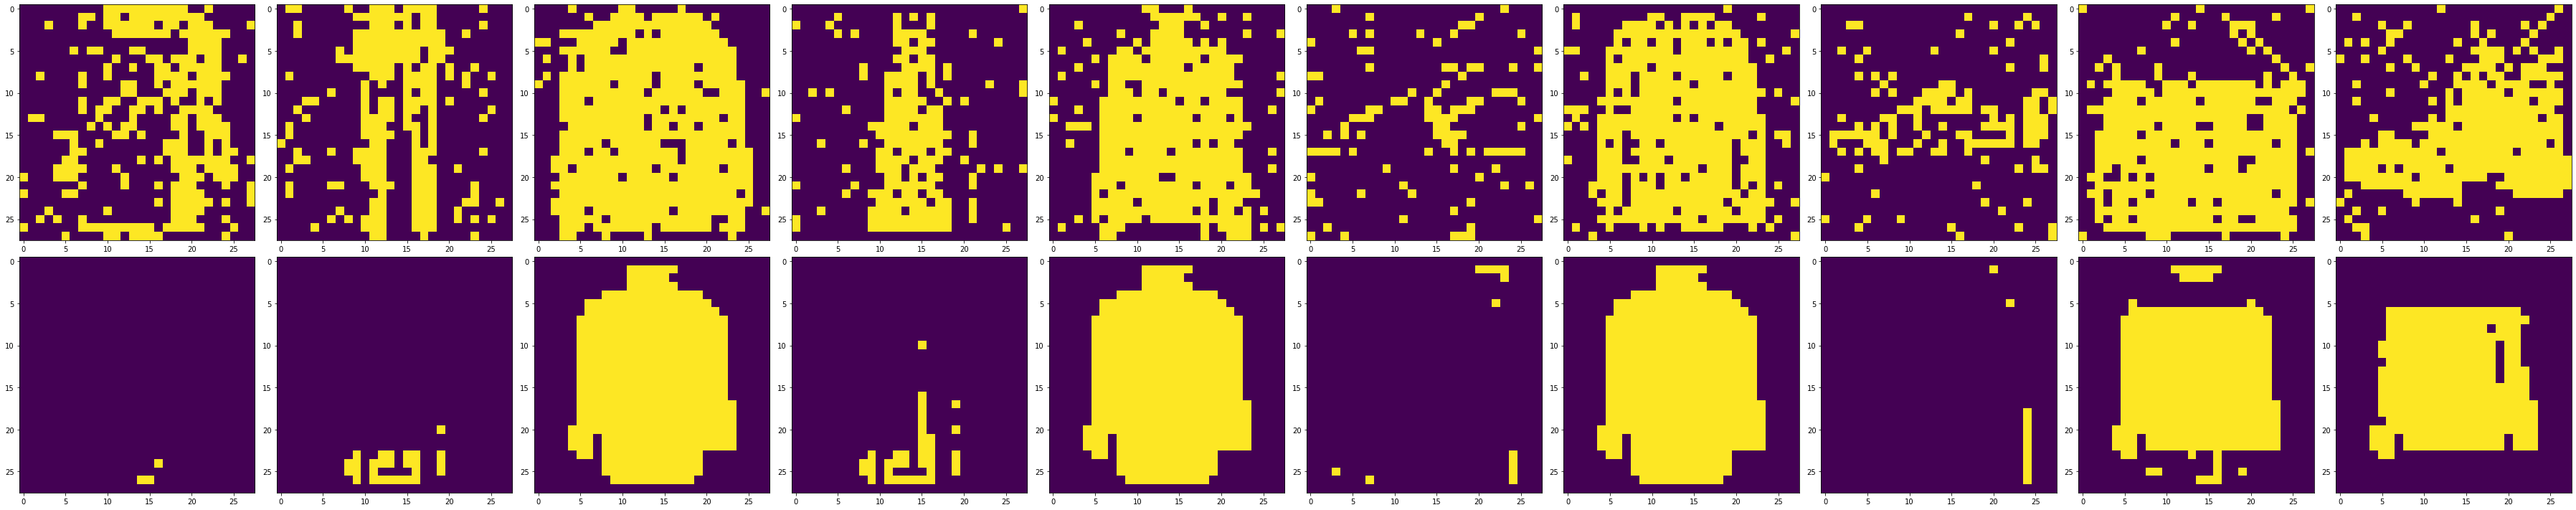

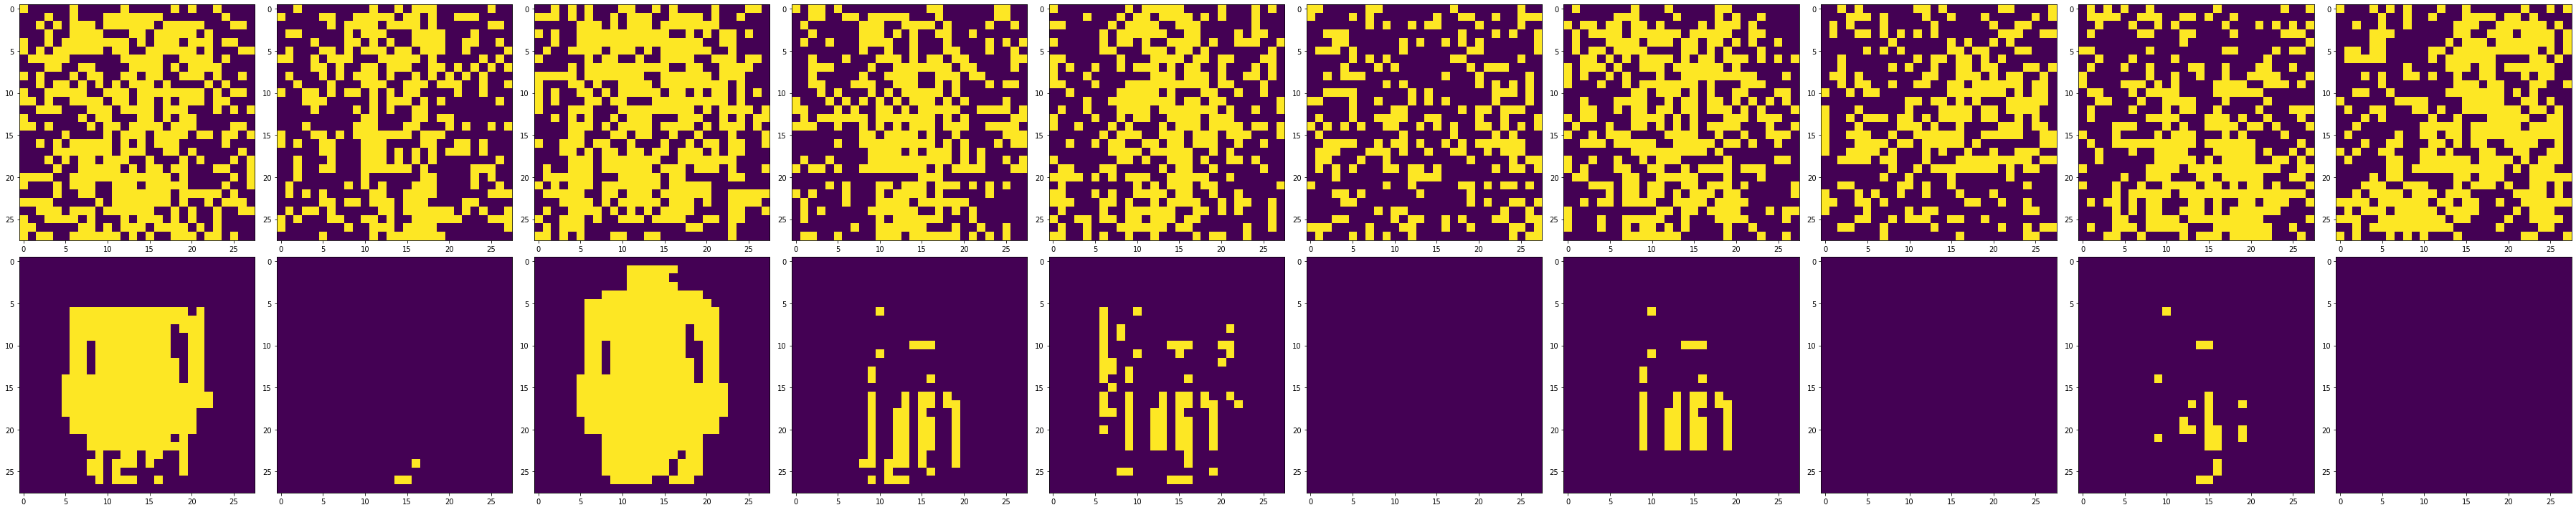

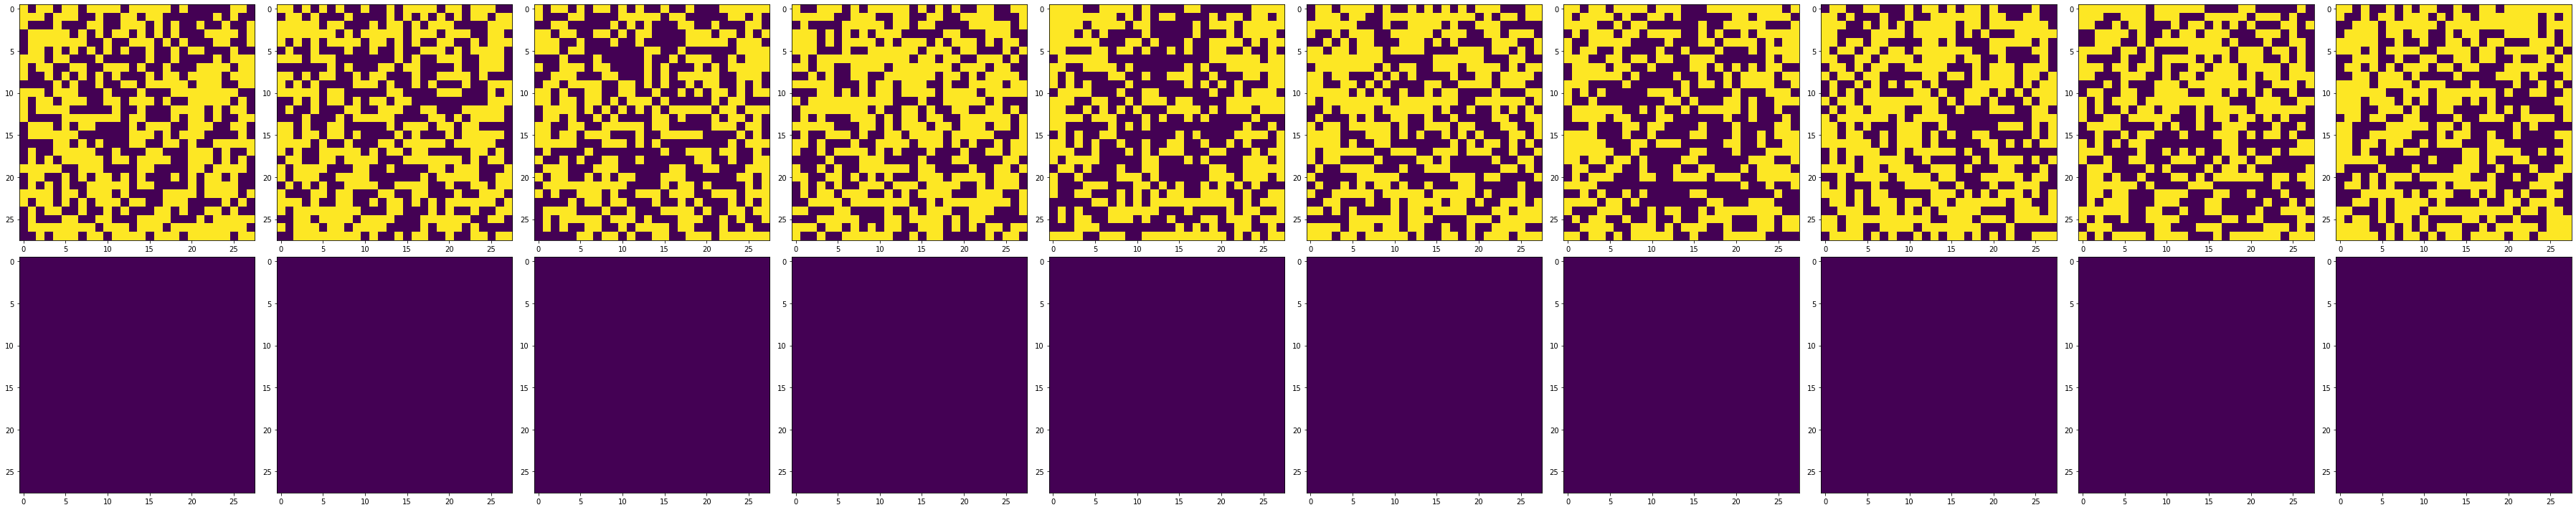

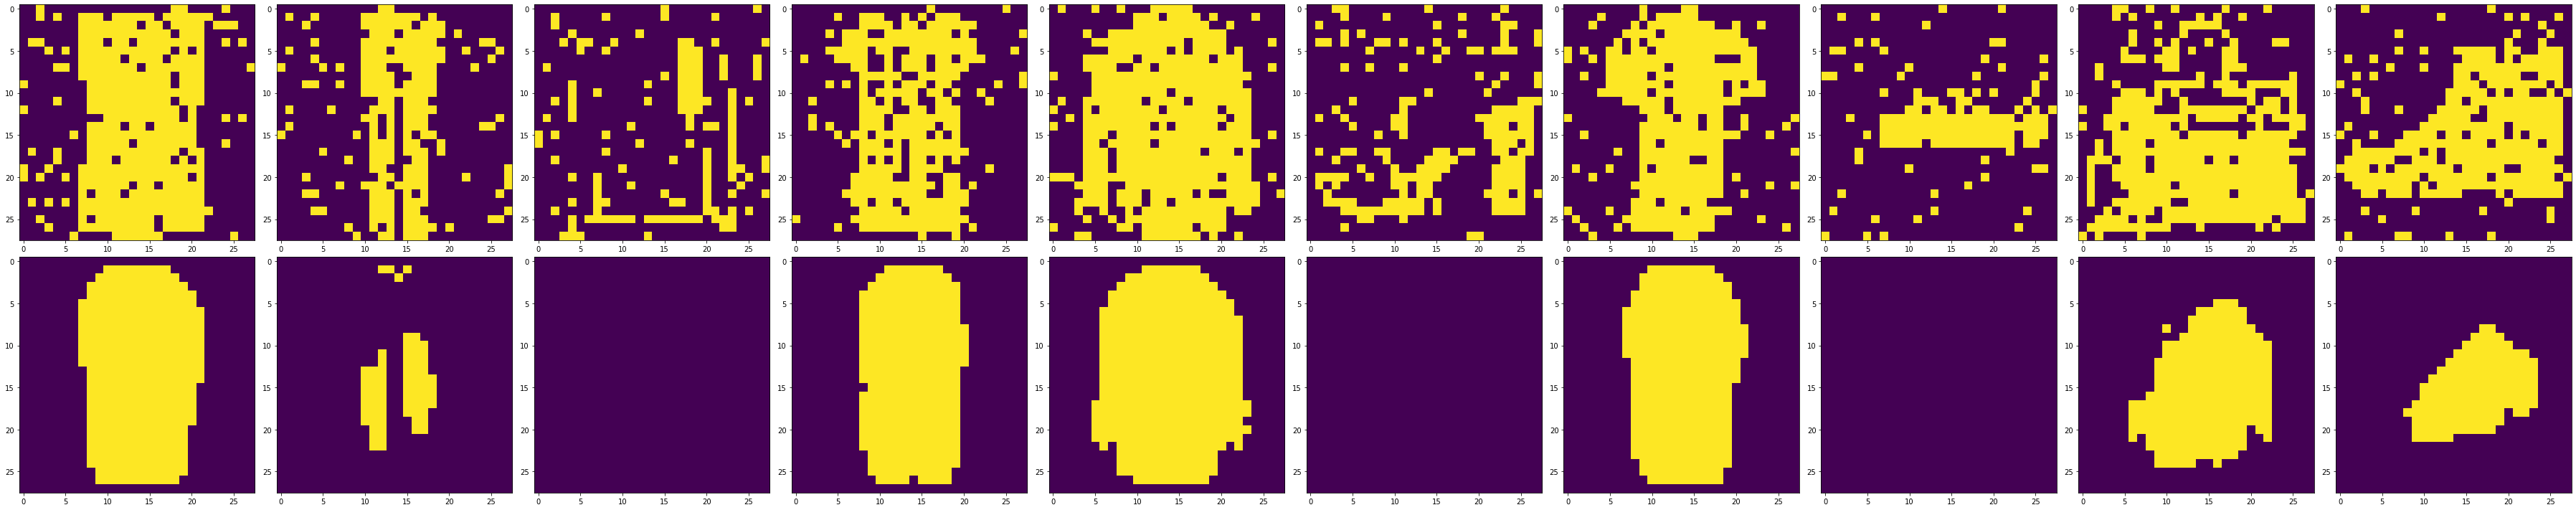

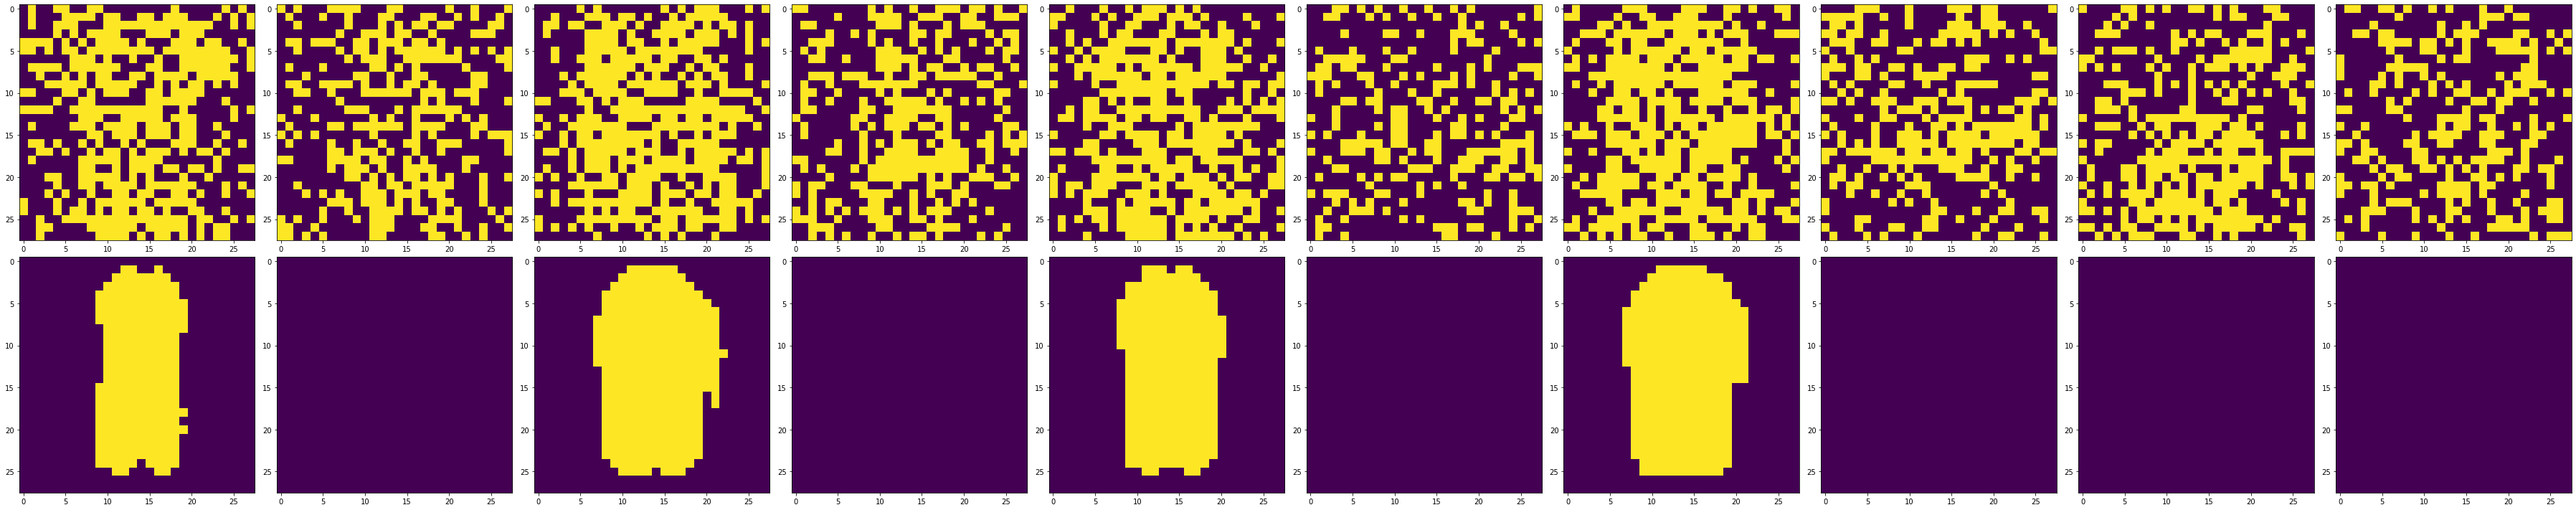

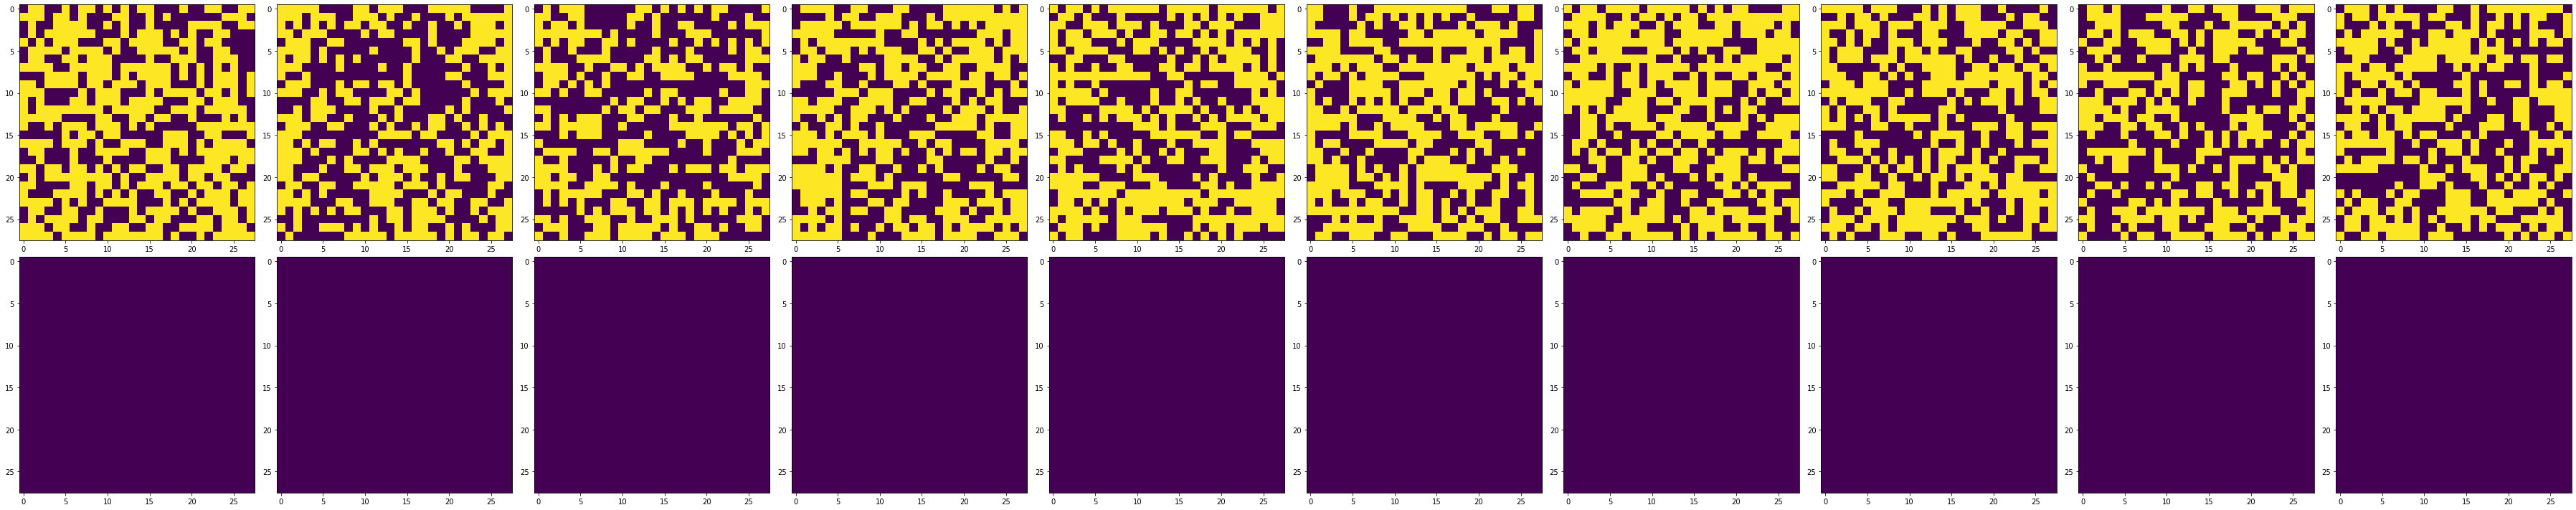

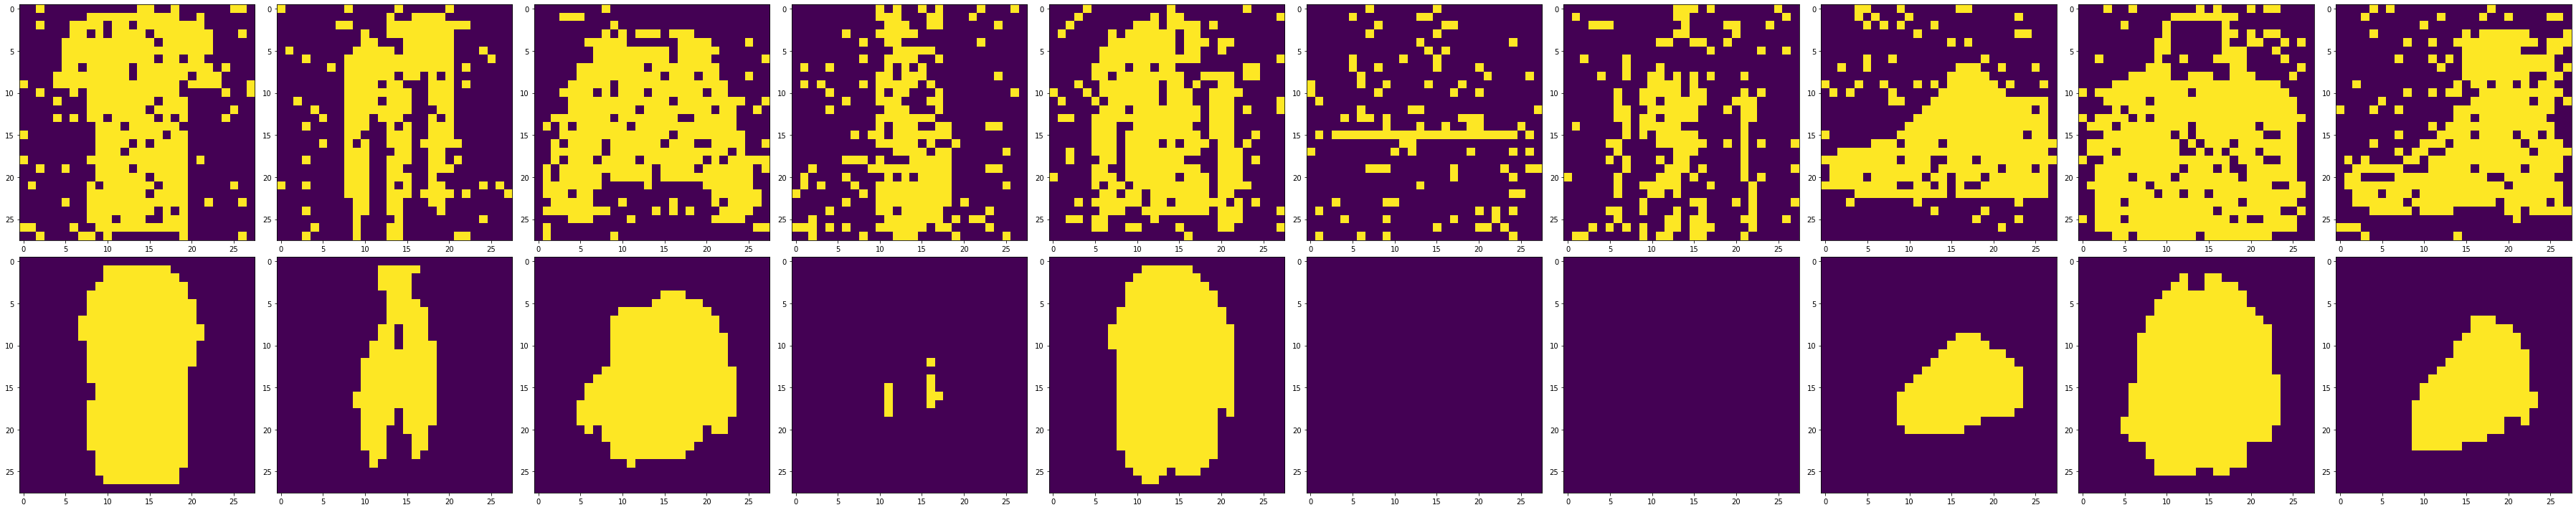

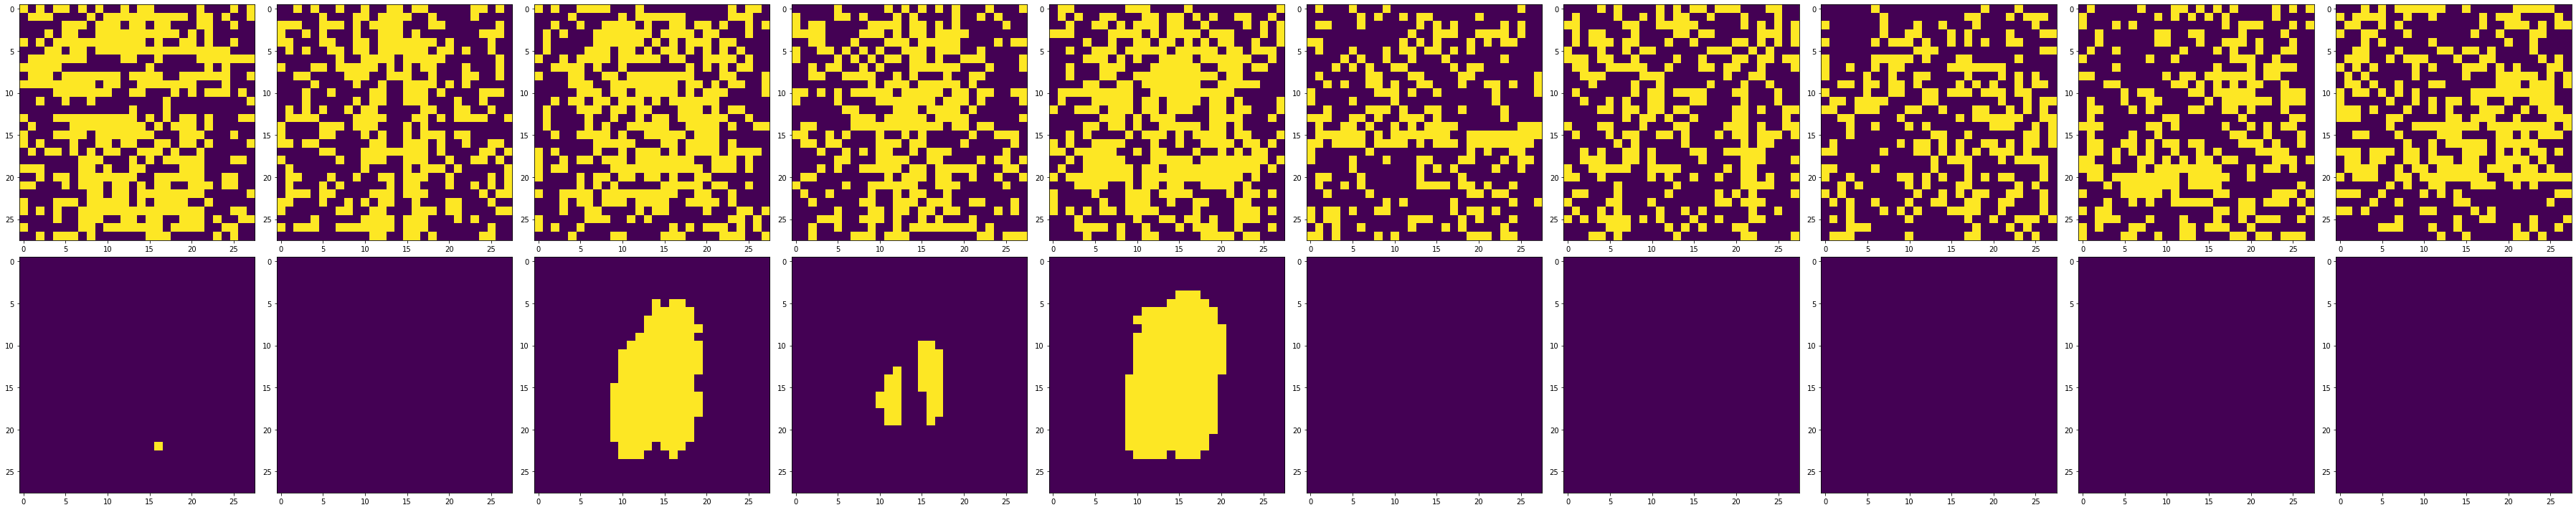

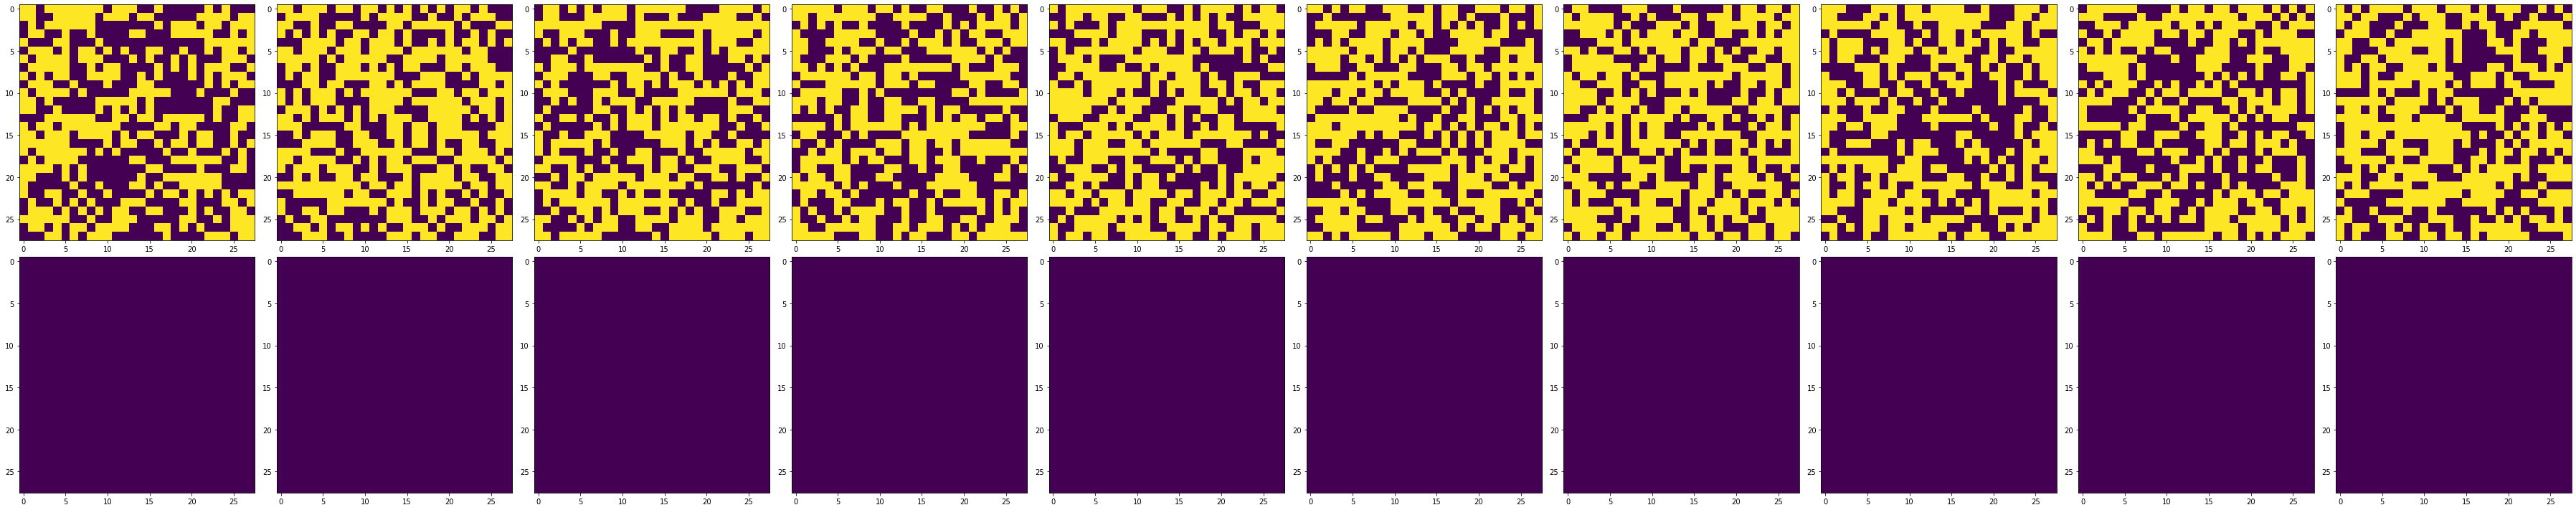

In [33]:
# Q2_graded
# Do not change the above line.
 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets


class Hopfield:
    def __init__(self, x_train, bias):
        self.bias = bias
        train = np.array(x_train)
        self.dimension = train.shape
        self.Weights = np.zeros((self.dimension[1], self.dimension[1]))

        #normalize data and weight matrix
        mean = np.sum([np.sum(t) for t in train]) / (len(train) * self.dimension[1])
        for sample in train:
            self.Weights += np.outer(sample - mean, sample - mean)
        np.fill_diagonal(self.Weights, 0)
        self.Weights /= len(train)

    def activation_function(self, x):
        return np.sign(self.Weights.dot(x) - self.bias)

#turn image into bipolar pattern
def make_pattern(size):
    perm = np.random.permutation(x_train)
    train = [perm[i] for i in range(size)]
    train = [np.sign(t.reshape(-1) * 2 - 1) for t in train]
    return train


def add_noise(picture, noise_percent):   
    picture = picture.reshape((10,-1))

    for i in range(picture.shape[0]):
        pixel = np.random.binomial(1, noise_percent, picture.shape[1])
        for j in range(picture.shape[1]):
            if pixel[j] == 1:
                picture[i][j] *= -1
    return picture

def mse(imageA, imageB):

	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


sizes = [6, 600, 60000]
noises = [0.1, 0.3, 0.6]


for i in range(3):

    train = make_pattern(sizes[i])
    print('Network size {}'.format(sizes[i]))

    for j in range(3):
        indexes = []
        for i in range(10):
            indexes += random.sample(mnist_dict[i], 1)

        sample_classes = x_train[indexes]
        pattern_data = np.array([np.sign(t.reshape(-1) * 2 - 1) for t in sample_classes])
        noisy_data = add_noise(pattern_data,noises[j])
        print('Noise percent {}'.format(noises[j]))

        fig, axs = plt.subplots(2, 10, figsize=(50,10))
        count_x = 0
        count_y = 0

        for noisy in noisy_data:
            axs[count_x, count_y].imshow(noisy.reshape(28, 28))
            count_y += 1

        model = Hopfield(train, bias=80)

        count_x += 1
        count_y = 0
        ims = []
        predict = []

        for d in noisy_data:
            data = model.activation_function(d)
            predict.append(data)

        predict=np.array(predict)    
        
        for i in range (predict.shape[0]):
            m = mse(pattern_data[i].reshape(28, 28), predict[i].reshape(28, 28))
            s = ssim(pattern_data[i].reshape(28, 28), predict[i].reshape(28, 28))
            axs[count_x, count_y].imshow(predict[i].reshape(28, 28))
            print(("MSE: %.2f, SSIM: %.2f" % (m, s)))
            count_y += 1
        fig.tight_layout()

# Q3

In [34]:
# Q3_graded
# Do not change the above line.

# Remove this comment and type your codes here

import pandas as pd
import numpy as np

def read_csv(filename):
  
    with open(filename) as f:
        cities = pd.read_csv(
            f,
            skiprows=1,
            sep=' ',
            names=['city', 'y', 'x'],
            dtype={'city': str, 'x': np.float64, 'y': np.float64},
            header=None,
            nrows=195
        )
        return cities

def normalize(points):
    """
    Normalizing each dimension by removing the
    initial offset and normalizing the points in a proportional interval: [0,1]
    on y, maintining the original ratio on x.
    """
    ratio = (points.x.max() - points.x.min()) / (points.y.max() - points.y.min()), 1
    ratio = np.array(ratio) / max(ratio)
    norm = points.apply(lambda c: (c - c.min()) / (c.max() - c.min()))
    return norm.apply(lambda p: ratio * p, axis=1)

In [35]:
# Q3_graded
# Do not change the above line.

def euclidean_distance(x, y):
    """Return the array of distances of two numpy arrays of points."""
    return np.linalg.norm(x - y, axis=1)

def select_closest(weights, x):
    """Return the index of the closest point to a given point."""
    return euclidean_distance(weights,x).argmin()

def route_distance(cities):
    """Return the cost of traversing a route of cities in a certain order."""
    points = cities[['x', 'y']]
    distances = euclidean_distance(points, np.roll(points, 1, axis=0))
    return np.sum(distances)

In [36]:
# Q3_graded
# Do not change the above line.

import numpy as np

def generate_network(size):
    """
    Generate a neuron network of a given size.
    Return a vector of two dimensional points in the interval [0,1].
    """
    return np.random.rand(size, 2)

def gaussian_neighborhood(center, radix, weights):
    """Get the range gaussian of given radix around a center index."""

    # Impose an upper bound on the radix to prevent NaN and blocks
    if radix < 1:
        radix = 1

    # Compute the circular network distance to the center
    deltas = np.absolute(center - np.arange(weights))
    distances = np.minimum(deltas, weights - deltas)

    # Compute Gaussian distribution around the given center
    return np.exp(-(distances*distances) / (2*(radix*radix)))

def get_route(cities, weights):
    """Return the route computed by a network."""
    cities['winner'] = cities[['x', 'y']].apply(
        lambda c: select_closest(weights, c),
        axis=1, raw=True)

    return cities.sort_values('winner').index

In [37]:
# Q3_graded
# Do not change the above line.

import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_network(cities, neurons, name='diagram.png', ax=None):
    
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['x'], cities['y'], color='red', s=4)
        axis.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)

        plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        plt.show()
        plt.close()

    else:
        ax.scatter(cities['x'], cities['y'], color='red', s=4)
        ax.plot(neurons[:,0], neurons[:,1], 'r.', ls='-', color='#0063ba', markersize=2)
        return ax

def plot_route(cities, route, name='diagram.png', ax=None):
    
    mpl.rcParams['agg.path.chunksize'] = 10000

    if not ax:
        fig = plt.figure(figsize=(5, 5), frameon = False)
        axis = fig.add_axes([0,0,1,1])

        axis.set_aspect('equal', adjustable='datalim')
        plt.axis('off')

        axis.scatter(cities['x'], cities['y'], color='red', s=4)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        axis.plot(route['x'], route['y'], color='purple', linewidth=1)

        plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=200)
        plt.show()
        plt.close()

    else:
        ax.scatter(cities['x'], cities['y'], color='red', s=4)
        route = cities.reindex(route)
        route.loc[route.shape[0]] = route.iloc[0]
        ax.plot(route['x'], route['y'], color='purple', linewidth=1)
        return ax

In [38]:
# Q3_graded
# Do not change the above line.

def som(problem, iterations, learning_rate=0.8):

    cities = problem.copy()
    cities[['x', 'y']] = normalize(cities[['x', 'y']])

    # The population size is 8 times the number of cities
    n = cities.shape[0] * 8

    # Generate an adequate network of neurons:
    weights = generate_network(n)
    print('Network of {} neurons created. Starting the iterations:'.format(n))

    for i in range(iterations):

        # Choose a random city
        city = cities.sample(1)[['x', 'y']].values

        # Find the index of the closest city to it
        winner_idx = select_closest(weights, city)

        # Generate a filter that applies changes to the winner's gaussian
        gaussian = gaussian_neighborhood(winner_idx, n//10, weights.shape[0])

        # Update the network's weights 
        weights += gaussian[:,np.newaxis] * learning_rate * (city - weights)
        
        # Decay the variables
        learning_rate = learning_rate * 0.99997
        n = n * 0.9997

        # Check for plotting interval
        if not i % 5555:
              plot_network(cities, weights, name='{:05d}.png'.format(i))

        # Check if any parameter has completely decayed.
        if n < 1:
            print('Radius has completely decayed, finishing execution',
            'at {} iterations'.format(i))
            break
        if learning_rate < 0.001:
            print('Learning rate has completely decayed, finishing execution',
            'at {} iterations'.format(i))
            break
    else:
        print('Completed {} iterations.'.format(iterations))

    plot_network(cities, weights, name='final.png')

    route = get_route(cities, weights)
    plot_route(cities, route, 'route.png')
    return route


In [39]:
# Q3_graded
# Do not change the above line.

from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving Cities.csv to Cities.csv


Network of 1552 neurons created. Starting the iterations:


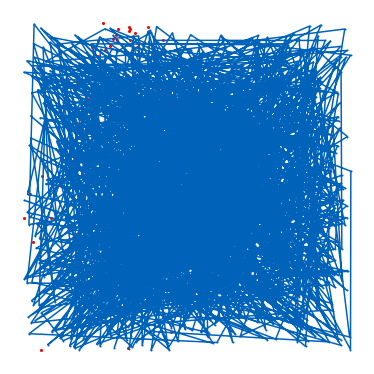

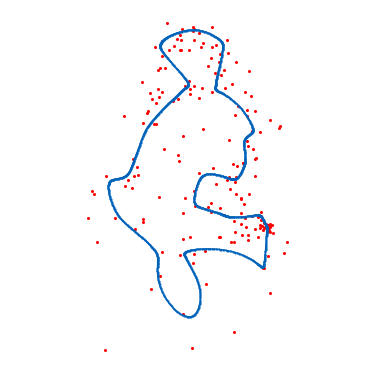

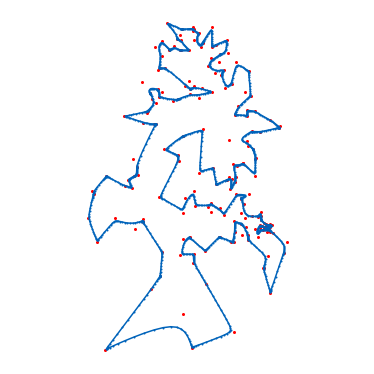

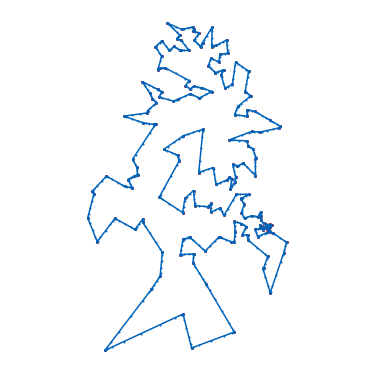

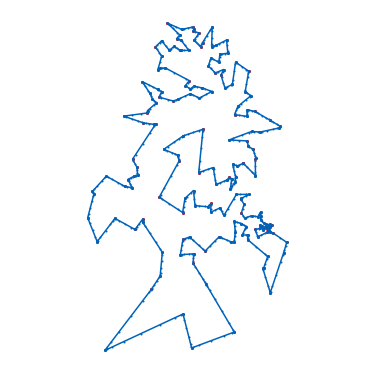

Radius has completely decayed, finishing execution at 24487 iterations


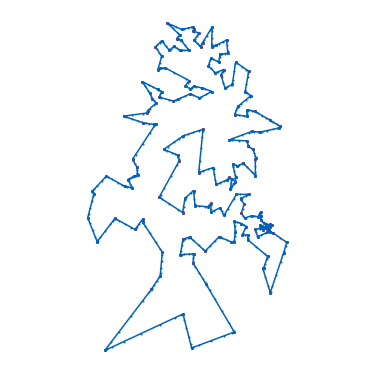

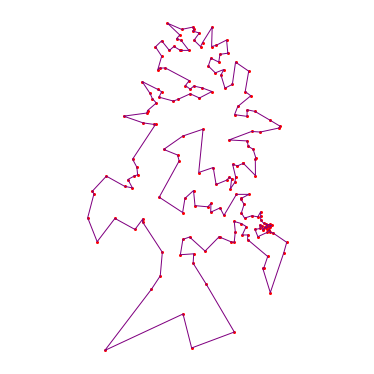

Route found of length 9929.908690225591


In [41]:
# Q3_graded
# Do not change the above line.

problem = read_csv('Cities.csv')
route = som(problem, 100000)
problem = problem.reindex(route)
distance = route_distance(problem)
print('Route found of length {}'.format(distance))

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI002_HW3.ipynb`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.